In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
os.getcwd()

'C:\\Users\\Prayuta\\Downloads'

In [2]:
df=pd.read_csv("analyzed.csv")  #This Project is made on Google Colab
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,Careful


In [4]:
# Checking basic statistics
df.describe()

,Merchant Id,Annual_Revenue,Spending_Score,Cluster_Number
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,1.515000
std,57.879185,26.264721,25.823522,1.569103
min,1.000000,15.000000,1.000000,0.000000
25%,50.750000,41.500000,34.750000,0.000000
50%,100.500000,61.500000,50.000000,1.000000
75%,150.250000,78.000000,73.000000,3.000000
max,200.000000,137.000000,99.000000,4.000000


In [5]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Cluster_Number          200 non-null    int64 
 6   Cluster_Nature          200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [6]:
# Check for missing values
df.isnull().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Cluster_Number            0
Cluster_Nature            0
dtype: int64

No null values in dataset

In [7]:
df['City'].value_counts()

Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: City, dtype: int64

In [8]:
df['Most_Purchased_Product'].value_counts()

Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: Most_Purchased_Product, dtype: int64

In [9]:
#Looking for null values
df.isna().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Cluster_Number            0
Cluster_Nature            0
dtype: int64

In [10]:
# Handle missing values (if any)
df['Annual_Revenue'].fillna(df['Annual_Revenue'].median(), inplace=True)
df['Spending_Score'].fillna(df['Spending_Score'].median(), inplace=True)

It will replace missing values with median

# **Exploratory Data Anaylsis(EDA)**

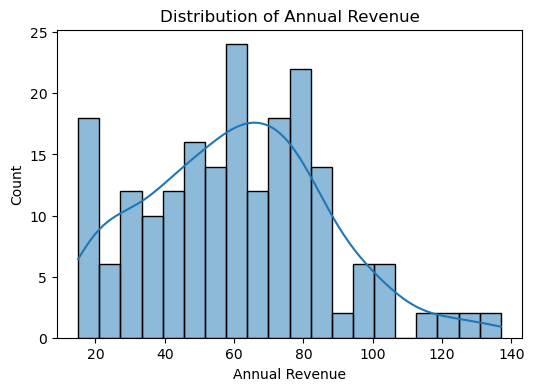

In [11]:
# Distribution of Annual Revenue
plt.figure(figsize=(6, 4))
sns.histplot(df['Annual_Revenue'], bins=20, kde=True)
plt.title('Distribution of Annual Revenue')
plt.xlabel('Annual Revenue')
plt.ylabel('Count')
plt.show()

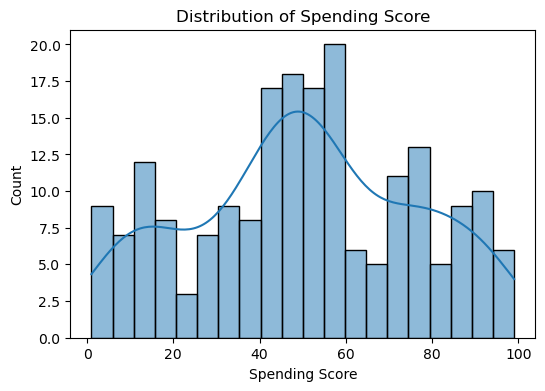

In [12]:
# Distribution of Spending Score
plt.figure(figsize=(6, 4))
sns.histplot(df['Spending_Score'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

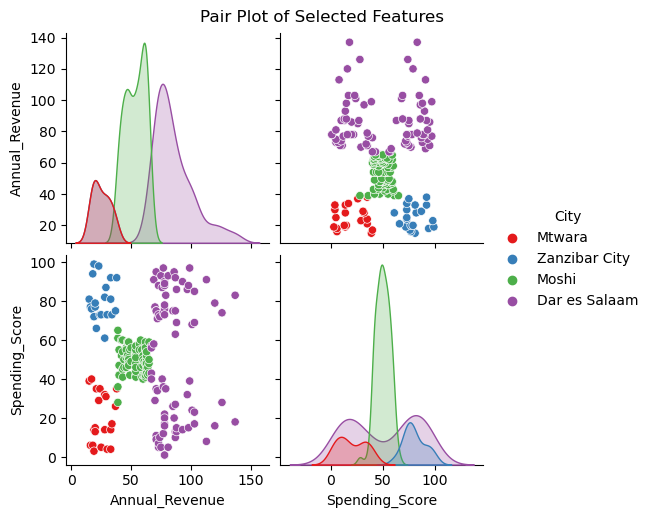

In [13]:
# Pair plot for selected features
sns.pairplot(df[['Annual_Revenue', 'Spending_Score', 'City']], hue='City', palette='Set1')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


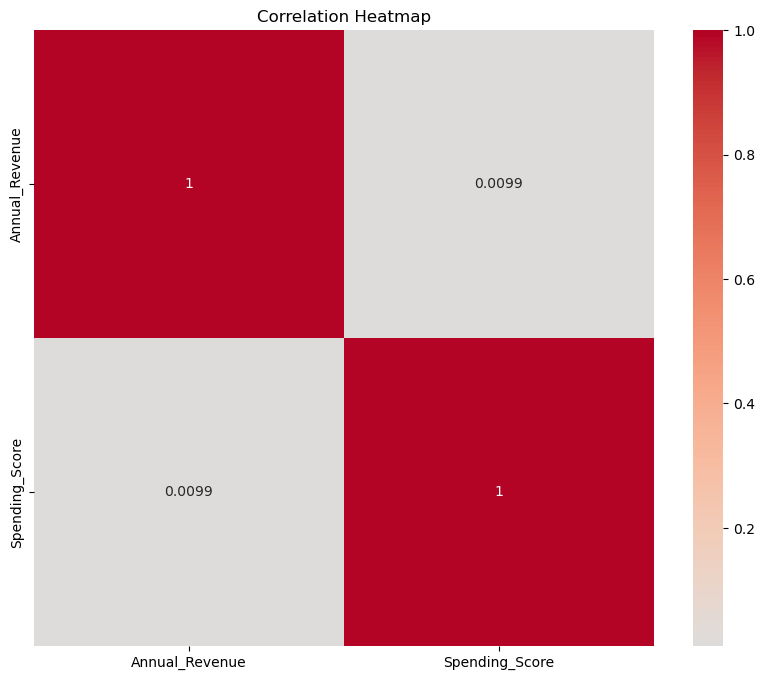

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Annual_Revenue', 'Spending_Score']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

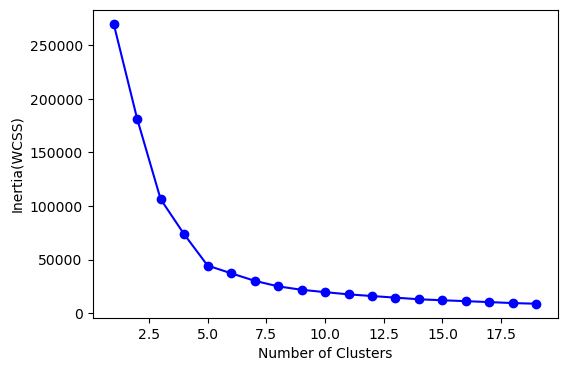

In [15]:
#Creating values for the elbow
plt.figure(figsize=(6, 4))
X = df.loc[:,["Annual_Revenue", "Spending_Score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia(WCSS)')
plt.show()


In [16]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prayuta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [18]:
len(y_kmeans)

200

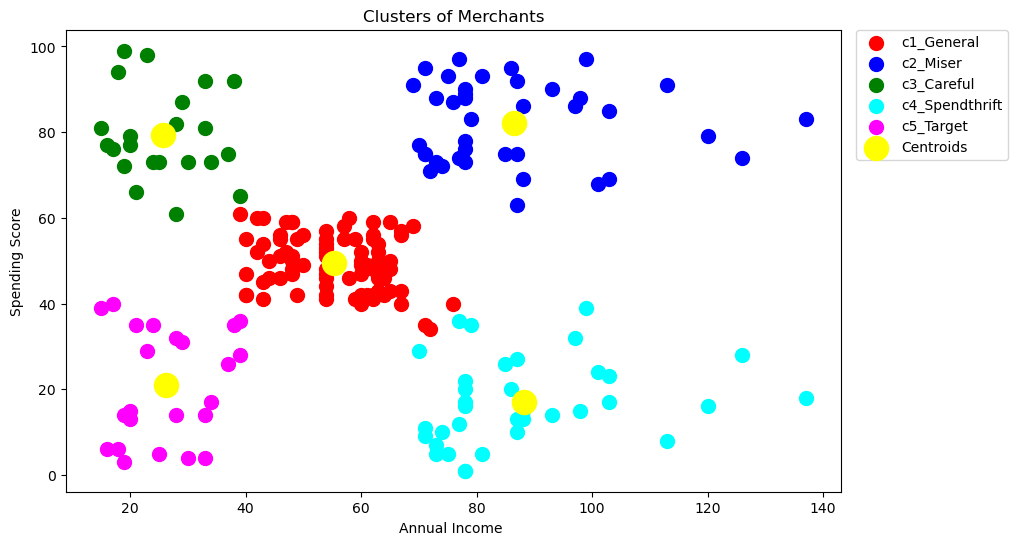

In [19]:
# Visualising the clusters
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0]['Annual_Revenue'], X[y_kmeans == 0]['Spending_Score'], s = 100, c = 'red', label = 'c1_General')
plt.scatter(X[y_kmeans == 1]['Annual_Revenue'], X[y_kmeans == 1]['Spending_Score'], s = 100, c = 'blue', label = 'c2_Miser')
plt.scatter(X[y_kmeans == 2]['Annual_Revenue'], X[y_kmeans == 2]['Spending_Score'], s = 100, c = 'green', label = 'c3_Careful')
plt.scatter(X[y_kmeans == 3]['Annual_Revenue'], X[y_kmeans == 3]['Spending_Score'], s = 100, c = 'cyan', label = 'c4_Spendthrift')
plt.scatter(X[y_kmeans == 4]['Annual_Revenue'], X[y_kmeans == 4]['Spending_Score'], s = 100, c = 'magenta', label = 'c5_Target')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Merchants')
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score')
# plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [20]:
df.loc[:,"Cluster_Number"] = y_kmeans

C:\Users\Prayuta\AppData\Local\Temp\ipykernel_21220\562817552.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"Cluster_Number"] = y_kmeans


In [21]:
Cluster_Nature = []

for row in df['Cluster_Number']:
    if row == 0:
        Cluster_Nature.append('General')
    elif row == 1:
        Cluster_Nature.append('Miser') # Miser is the one who hoards wealth and spends a little money
    elif row == 2: Cluster_Nature.append('Careful')
    elif row == 3: Cluster_Nature.append('Spendthrift') # spendthrift is the one who spends money in an extravagant
    elif row == 4:  Cluster_Nature.append('Target')
    else: Cluster_Nature.append('Outlier')

df['Cluster_Nature'] = Cluster_Nature


**Miser:-** Person who loves to have a lot of money but hates to spend it

**Spendthirft:-** A person who spends a lot of money carelessly or wastes money

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Cluster_Number          200 non-null    int32 
 6   Cluster_Nature          200 non-null    object
dtypes: int32(1), int64(3), object(3)
memory usage: 10.3+ KB


In [23]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,4,Target
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,Careful
2,3,16,6,Mtwara,Mtindi 500ml,4,Target
3,4,16,77,Zanzibar City,Fresh Milk 250ml,2,Careful
4,5,17,40,Mtwara,Mtindi 500ml,4,Target


In [24]:
df['Cluster_Nature'].value_counts()

General        81
Miser          39
Spendthrift    35
Target         23
Careful        22
Name: Cluster_Nature, dtype: int64

In [26]:
uniqueValues = df['Cluster_Nature'].unique()
print(uniqueValues)

['Target' 'Careful' 'General' 'Miser' 'Spendthrift']


In [27]:
target_df = df.loc[df['Cluster_Nature'] == 'Target']

In [28]:
target_df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,4,Target
2,3,16,6,Mtwara,Mtindi 500ml,4,Target
4,5,17,40,Mtwara,Mtindi 500ml,4,Target
6,7,18,6,Mtwara,Mtindi 500ml,4,Target
8,9,19,3,Mtwara,Mtindi 500ml,4,Target


C:\Users\Prayuta\AppData\Local\Temp\ipykernel_21220\3996023353.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['City']).sum().plot(


<Axes: >

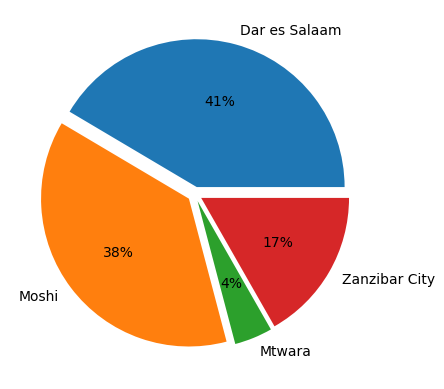

In [29]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)

# Plotting the pie chart for above dataframe
df.groupby(['City']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

Dar es Salaam is city where we used to spend more  on distributor products and the behaviour of the customer i.e 41%.After that Moshi with 38%

C:\Users\Prayuta\AppData\Local\Temp\ipykernel_21220\2615171597.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Most_Purchased_Product']).sum().plot(


<Axes: >

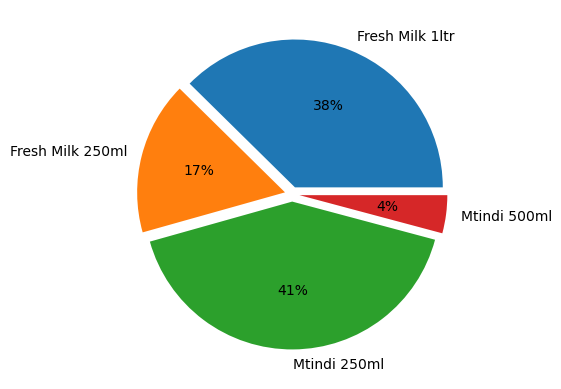

In [30]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)

# Plotting the pie chart for above dataframe
df.groupby(['Most_Purchased_Product']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False, ylabel='')

mthindi 250ml is the milk product where we spend highest money(41%) on distributor products and the behaviour of the customer.After that fresh milk 1 ltr with 38%.

Cluster_Nature  Careful  General  Miser  Spendthrift  Target
City                                                        
Dar es Salaam         0        8     39           35       0
Moshi                 1       73      0            0       2
Mtwara                0        0      0            0      21
Zanzibar City        21        0      0            0       0


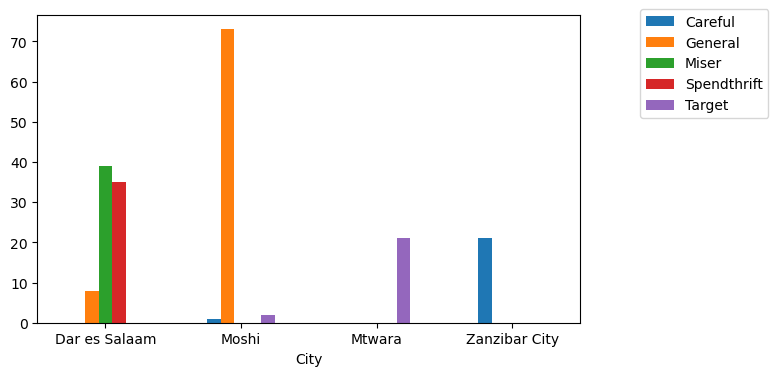

In [31]:
# Cross tabulation between City and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['City'],columns=df['Cluster_Nature'])
print(CrosstabResult)
# Grouped bar chart
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.legend(bbox_to_anchor=(1.36, 1.04))

City                    Dar es Salaam  Moshi  Mtwara  Zanzibar City
Most_Purchased_Product                                             
Fresh Milk 1ltr                     0     76       0              0
Fresh Milk 250ml                    0      0       0             21
Mtindi 250ml                       82      0       0              0
Mtindi 500ml                        0      0      21              0


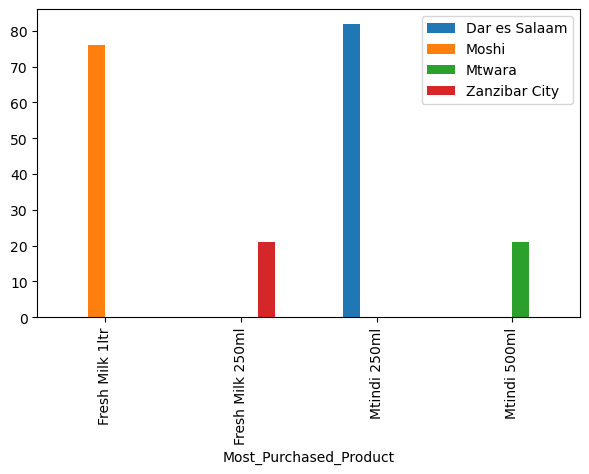

In [32]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['Most_Purchased_Product'],columns=df['City'])
print(CrosstabResult)
# Grouped bar chart
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

***MOST PURCHASED PRODUCT is Mtindi 250ml after that Fresh Milk 1ltr***

                              Annual_Revenue
City          Cluster_Nature                
Dar es Salaam General              69.500000
              Miser                86.538462
              Spendthrift          88.200000
Moshi         Careful              39.000000
              General              53.739726
              Target               39.000000
Mtwara        Target               25.095238
Zanzibar City Careful              25.095238


<Axes: xlabel='City,Cluster_Nature'>

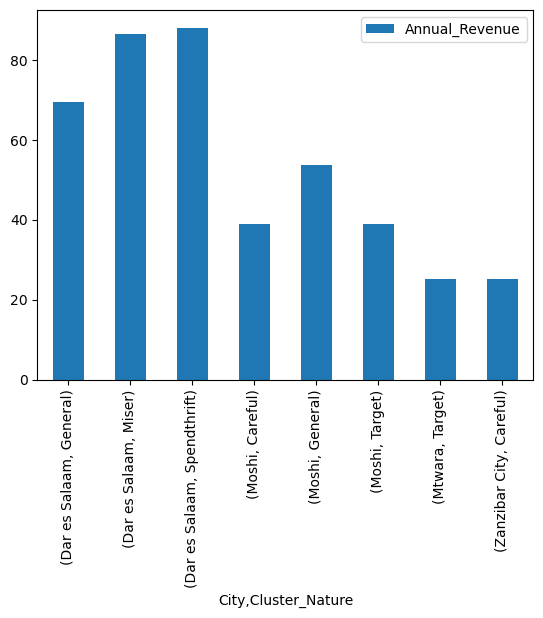

In [33]:
#Pivoit Table on city vs Cluster Nature aggregated by Annual Revenue
table = pd.pivot_table(df,index=['City','Cluster_Nature'],aggfunc={'Annual_Revenue':np.mean}) #,'Most_Purchased_Product':np.sum
print(table)
table.plot(kind='bar')

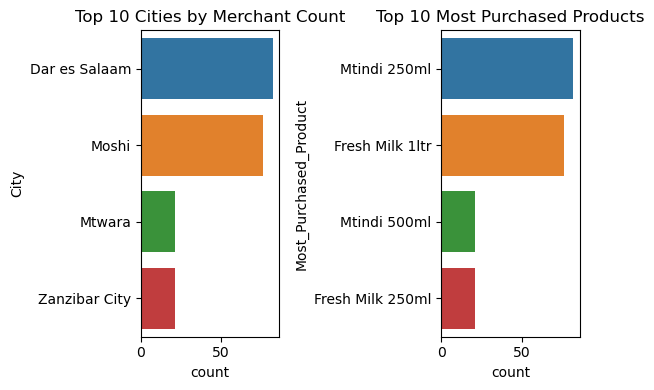

In [34]:
# Count plots for categorical features
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Merchant Count')

plt.subplot(1, 2, 2)
sns.countplot(y='Most_Purchased_Product', data=df, order=df['Most_Purchased_Product'].value_counts().index[:10])
plt.title('Top 10 Most Purchased Products')
plt.tight_layout()
plt.show()

***COUNT OF TOP 10 Cities and TOP 10 Most Purchased Product***

***Out of 10 it is showing only 4 Because We have only 4 cities and we have only 4 most purchased products that's why it is showing only 4***

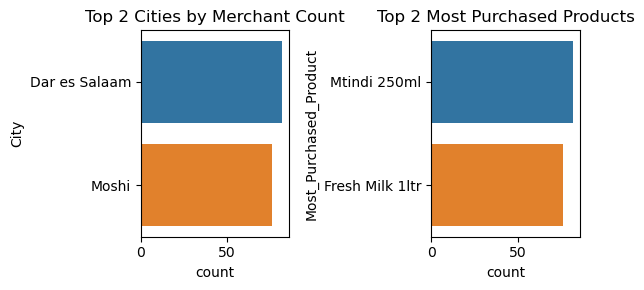

In [35]:
# Count plots for categorical features
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:2])
plt.title('Top 2 Cities by Merchant Count')

plt.subplot(1, 2, 2)
sns.countplot(y='Most_Purchased_Product', data=df, order=df['Most_Purchased_Product'].value_counts().index[:2])
plt.title('Top 2 Most Purchased Products')
plt.tight_layout()
plt.show()

In [36]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,4,Target
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,Careful
2,3,16,6,Mtwara,Mtindi 500ml,4,Target
3,4,16,77,Zanzibar City,Fresh Milk 250ml,2,Careful
4,5,17,40,Mtwara,Mtindi 500ml,4,Target


# ***PROBLEM'S SOLUTIONS***


# Make use of the merchant data set below to develop models that will help Cow and Buffalo Milk company target the right customers.


**PROBLEM 2-**Given the payment history that the merchant has and the cities that the merchant operates in, create a credit scoring algorithm that will help the distributor.**


**CREDIT SCORING ALGO**

In [37]:
# Display the first few rows and inspect the columns
print(df.head())
print(df.info())

# Drop rows with missing values if any
df.dropna(inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Most_Purchased_Product'] = le.fit_transform(df['Most_Purchased_Product'])


   Merchant Id  Annual_Revenue  Spending_Score           City  \
0            1              15              39         Mtwara   
1            2              15              81  Zanzibar City   
2            3              16               6         Mtwara   
3            4              16              77  Zanzibar City   
4            5              17              40         Mtwara   

  Most_Purchased_Product  Cluster_Number Cluster_Nature  
0           Mtindi 500ml               4         Target  
1       Fresh Milk 250ml               2        Careful  
2           Mtindi 500ml               4         Target  
3       Fresh Milk 250ml               2        Careful  
4           Mtindi 500ml               4         Target  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 

# **MODEL BUILDING**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select features and target
X = df[['Annual_Revenue', 'Spending_Score', 'City', 'Most_Purchased_Product', 'Cluster_Number']]
y = df['Cluster_Nature']  # Assuming 'Cluster_Nature' as the target variable to predict

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

     Careful       1.00      1.00      1.00         3
     General       1.00      1.00      1.00        18
       Miser       1.00      1.00      1.00         5
 Spendthrift       1.00      1.00      1.00        11
      Target       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy: 1.0


**PROBLEM 3:-** **Figure out which are the most creditworthy merchants and which ones are not**

In [39]:
# Predict cluster nature for all merchants
df['Predicted_Cluster_Nature'] = clf.predict(X)

# Identify most creditworthy merchants
most_creditworthy = df[df['Predicted_Cluster_Nature'].isin(['Careful', 'General'])]

# Identify least creditworthy merchants
least_creditworthy = df[df['Predicted_Cluster_Nature'].isin(['Spendthrift', 'Miser'])]

# Output results to CSV
df.to_csv('final_analyzed_data.csv', index=False)
print(df.head())

# Display the results
print("Most Creditworthy Merchants:")
print(most_creditworthy)

print("\nLeast Creditworthy Merchants:")
print(least_creditworthy)

print("final_analyzed_data.csv file saved successfully")

   Merchant Id  Annual_Revenue  Spending_Score  City  Most_Purchased_Product  \
0            1              15              39     2                       3   
1            2              15              81     3                       1   
2            3              16               6     2                       3   
3            4              16              77     3                       1   
4            5              17              40     2                       3   

   Cluster_Number Cluster_Nature Predicted_Cluster_Nature  
0               4         Target                   Target  
1               2        Careful                  Careful  
2               4         Target                   Target  
3               2        Careful                  Careful  
4               4         Target                   Target  
Most Creditworthy Merchants:
     Merchant Id  Annual_Revenue  Spending_Score  City  \
1              2              15              81     3   
3             

In [40]:
df.head(199)

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature,Predicted_Cluster_Nature
0,1,15,39,2,3,4,Target,Target
1,2,15,81,3,1,2,Careful,Careful
2,3,16,6,2,3,4,Target,Target
3,4,16,77,3,1,2,Careful,Careful
4,5,17,40,2,3,4,Target,Target
...,...,...,...,...,...,...,...,...
194,195,120,16,0,2,3,Spendthrift,Spendthrift
195,196,120,79,0,2,1,Miser,Miser
196,197,126,28,0,2,3,Spendthrift,Spendthrift
197,198,126,74,0,2,1,Miser,Miser


 **PROBLEM 4-**
 **Create a parameter based on their nature from the cluster group they belong to, such as Careful, Spendthrift, General, Target and Miser**

In [297]:
# Example: Allocate advertising spend based on cluster insights
cluster_summary = df.groupby('Cluster_Number')['Annual_Revenue'].mean()

# Example recommendation: Focus advertising on clusters with high average annual revenue
print("Cluster-wise Annual Revenue Summary:")
print(cluster_summary)


Cluster-wise Annual Revenue Summary:
Cluster_Number
0    55.296296
1    88.200000
2    26.304348
3    25.727273
4    86.538462
Name: Annual_Revenue, dtype: float64


**By following these steps, Cow and Buffalo Milk company can effectively enhance sales and optimize advertising spend. The credit scoring algorithm helps identify creditworthy merchants, while clustering provides insights into customer segments for targeted marketing strategies.**

***Ans. 5th Problem***
**Targeting Strategy:**
Focus on 'Careful' and 'General' (Cluster_Nature).These categories typically indicate more stable purchasing patterns and higher creditworthiness.
Merchants in these categories are likely to provide better returns on advertising investments due to their consistent behavior and reliability.


**Avoidance Strategy:** Exercise caution with merchants categorized as 'Spendthrift' and 'Miser'. These categories may exhibit erratic purchasing behaviors.
Erratic behaviors can lead to unpredictable outcomes and potentially lower returns on advertising investments.

# **PROBLEM 1:-**  
**Ans. To Increase sales and become more efficient in allocating advertisement Spend- Analyse data first See that which product is most purchased product,which city is purchasing most that most purchased product,City person's belongs to which cluster(Careful,General,Spendthirft and miser) choose careful and General cluster type customer then allocate advertising spend and other spends like customer engaagement spend,ad spend and all.**

# **PROBLEM 6:-**  
**Download the final analysed data into CSV file with the below sample format having to which cluster they belong to and their nature columns for all the merchants in the data.**

Successfully Done Above in Problem 3